In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [116]:
df_offers=pd.read_csv('data_offers.csv')

In [117]:
df_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [118]:
df_orders=pd.read_csv('data_orders.csv')

In [119]:
df_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [120]:
df_offers.columns

Index(['order_gk', 'offer_id'], dtype='object')

In [121]:
df_orders.columns

Index(['order_datetime', 'origin_longitude', 'origin_latitude', 'm_order_eta',
       'order_gk', 'order_status_key', 'is_driver_assigned_key',
       'cancellations_time_in_seconds'],
      dtype='object')

In [122]:
df=df_orders.merge(right=df_offers,how='inner',on='order_gk')

In [123]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [124]:
df['is_driver_assigned']=np.where(df['is_driver_assigned_key']==1,"Yes","No")
df['order_status']=np.where(df['order_status_key']==4,"Client_cancelled","System Reject")

df.drop(columns=["is_driver_assigned_key","order_status_key"],inplace=True)

In [125]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client_cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client_cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client_cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client_cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client_cancelled


In [126]:
df=df.rename(columns={'order_datetime':"order_time"})

In [127]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client_cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client_cancelled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client_cancelled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client_cancelled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client_cancelled


In [128]:
df_que1=df.groupby(by=['is_driver_assigned','order_status'])['order_gk'].count().reset_index()

In [129]:
df_que1

,is_driver_assigned,order_status,order_gk
0,No,Client_cancelled,13435
1,No,System Reject,9469
2,Yes,Client_cancelled,8360
3,Yes,System Reject,4


<Axes: >

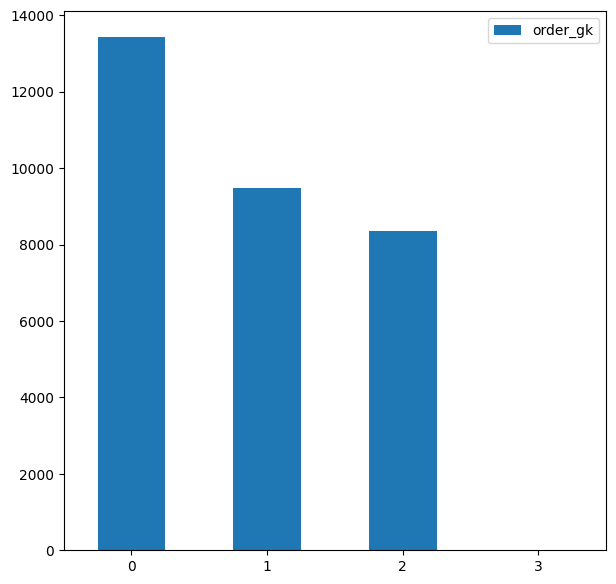

In [130]:
df_que1.plot(kind='bar',subplots=False,figsize=(7,7),legend=True,rot=0)

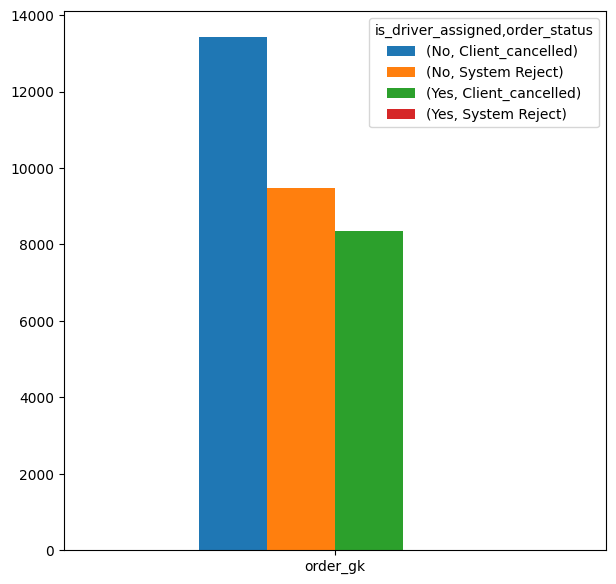

In [131]:
df_q1 = df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")
_ = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

In [132]:
df["order_hour"] = df["order_time"].str.split(":").apply(lambda split: split[0])


In [133]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client_cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client_cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client_cancelled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client_cancelled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client_cancelled,12


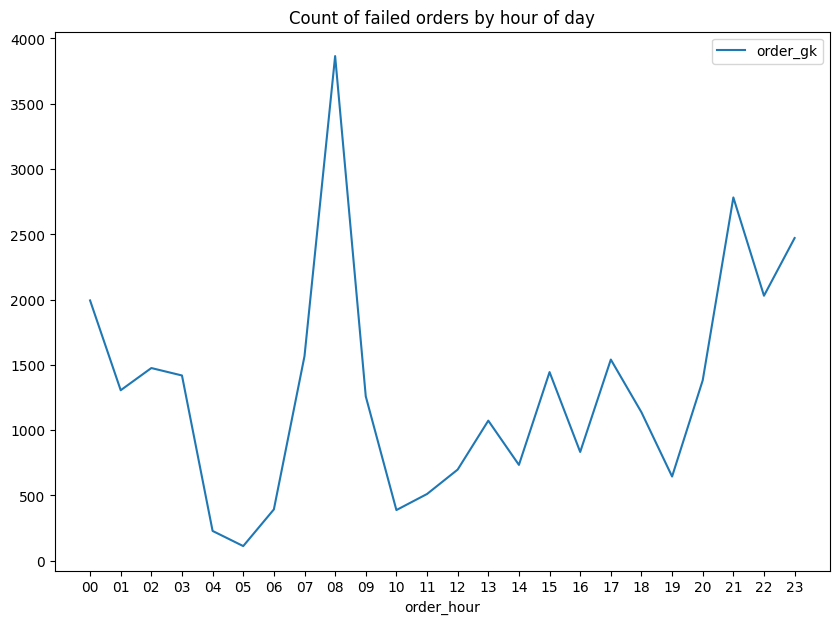

In [134]:
_=df.groupby(by="order_hour")["order_gk"].count().plot(figsize=(10,7),legend=True,xticks=range(0,24),title="Count of failed orders by hour of day")

In [135]:
group_2=df.groupby(by=["order_hour","is_driver_assigned","order_status"])["order_gk"].count().reset_index()

In [136]:
group_2.head()

,order_hour,is_driver_assigned,order_status,order_gk
0,00,No,Client_cancelled,957
1,00,No,System Reject,706
2,00,Yes,Client_cancelled,326
3,00,Yes,System Reject,4
4,01,No,Client_cancelled,633


In [137]:
df.head()

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client_cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client_cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client_cancelled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client_cancelled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client_cancelled,12


In [147]:
group_3=df.groupby(by=["order_hour", "is_driver_assigned"])["cancellations_time_in_seconds"].mean()

In [149]:
group_3.reset_index()

,order_hour,is_driver_assigned,cancellations_time_in_seconds
0,00,No,115.126437
1,00,Yes,276.082822
2,01,No,100.593997
3,01,Yes,296.312081
4,02,No,121.305461
5,02,Yes,301.466667
6,03,No,129.182301
7,03,Yes,368.682051
8,04,No,100.733333
9,04,Yes,245.250000
